In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import pyflux as pf
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sm
import statsmodels.tsa.api as smt

In [22]:
msft = pd.DataFrame.from_csv('MSFT.csv')
msft = msft.fillna(msft.mean())
msft.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-09-15,56.15,57.350,55.98,57.19,26435104.0,0.0,1.0,56.15,57.350,55.98,57.19,26435104.0
2016-09-14,56.39,56.630,56.03,56.26,23616182.0,0.0,1.0,56.39,56.630,56.03,56.26,23616182.0
2016-09-13,56.50,56.650,56.05,56.53,29465088.0,0.0,1.0,56.50,56.650,56.05,56.53,29465088.0
2016-09-12,56.00,57.205,55.61,57.05,28441578.0,0.0,1.0,56.00,57.205,55.61,57.05,28441578.0
2016-09-09,56.79,57.520,56.21,56.21,33475922.0,0.0,1.0,56.79,57.520,56.21,56.21,33475922.0


In [23]:
def test_stationarity(timeseries):
    #Determining Rolling Statistics
    
    rolmean=pd.Series.rolling(timeseries, window=12).mean()
    rolstd=pd.Series.rolling(timeseries, window=12).std()
    
    #Plot Rolling Statistics
    plt.figure(figsize=(17,7))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')    
    plt.legend(loc='best')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dicket Fuller Test:'
    dftest=sm.adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print dfoutput

In [24]:
yr2000=pd.date_range('2000-01-01','2001-01-01', freq='D')
msft2000 = msft.loc[yr2000].dropna()
op = msft2000.Open
high = msft2000.High
low = msft2000.Low
close = msft2000.Close
msft2000.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
2000-01-03,117.38,118.62,112.00,116.56,26614200.0,0.0,1.0,40.426354,40.853417,38.573450,40.143941,53228400.0
2000-01-04,113.56,117.12,112.25,112.62,27059500.0,0.0,1.0,39.110724,40.336808,38.659552,38.786982,54119000.0
2000-01-05,111.12,116.38,109.38,113.81,32029800.0,0.0,1.0,38.270373,40.081948,37.671107,39.196825,64059600.0
2000-01-06,112.19,113.88,108.38,110.00,27488300.0,0.0,1.0,38.638888,39.220933,37.326701,37.884639,54976600.0
2000-01-07,108.62,112.25,107.31,111.44,31006800.0,0.0,1.0,37.409359,38.659552,36.958187,38.380583,62013600.0


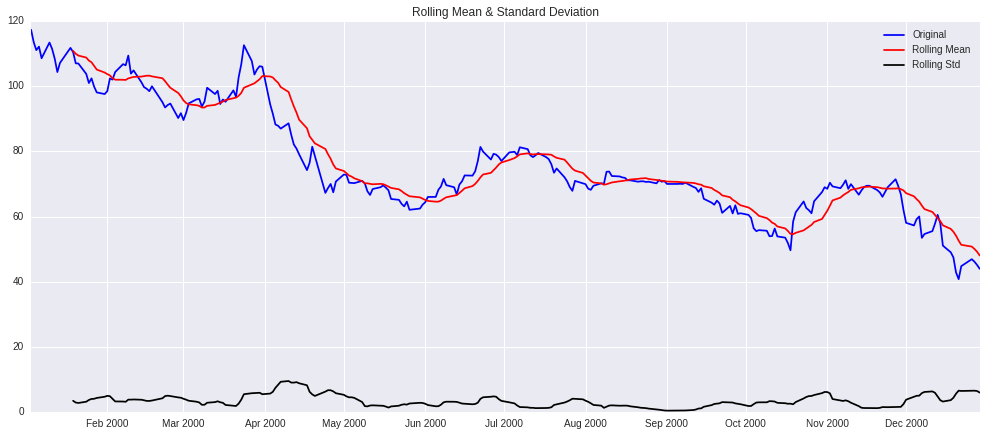

Results of Dicket Fuller Test:
Test Statistic                  -1.623959
p-value                          0.470654
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (5%)             -2.873125
Critical Value (1%)             -3.456674
Critical Value (10%)            -2.572944
dtype: float64


In [25]:
test_stationarity(op)

In [26]:
##making the time series stationary by differencing
msftdiff = msft2000 - msft2000.shift()
msftdiff = msftdiff.dropna()
opdiff = msftdiff.Open
highdiff = msftdiff.High
lowdiff = msftdiff.Low
closediff = msftdiff.Close

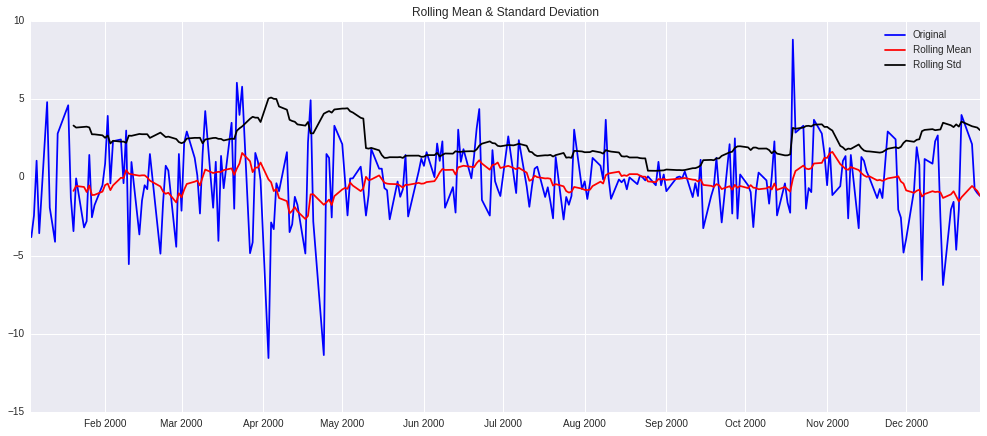

Results of Dicket Fuller Test:
Test Statistic                -7.927976e+00
p-value                        3.576000e-12
#Lags Used                     3.000000e+00
Number of Observations Used    2.470000e+02
Critical Value (5%)           -2.873314e+00
Critical Value (1%)           -3.457105e+00
Critical Value (10%)          -2.573044e+00
dtype: float64


In [27]:
test_stationarity(opdiff)

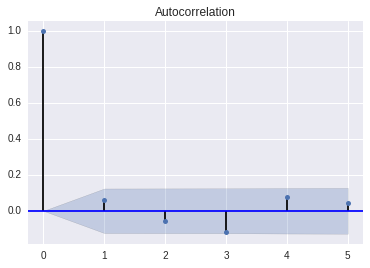

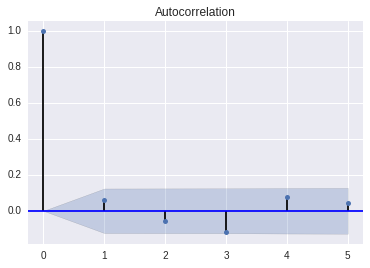

In [28]:
##determines MA order
smt.graphics.plot_acf(opdiff, lags=5)

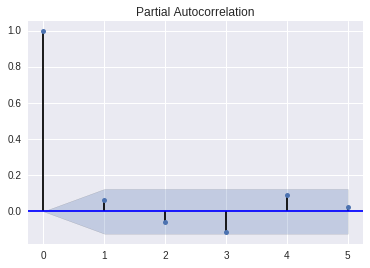

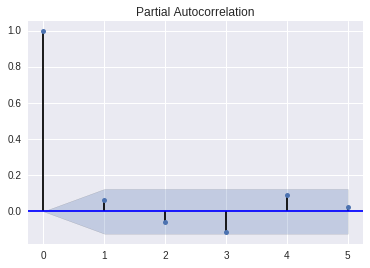

In [29]:
##determines AR order
smt.graphics.plot_pacf(opdiff, lags=5)

In [30]:
sm.arma_order_select_ic(op,max_ar=3, max_ma=3)

/home/chuanfuyap/Applications/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/chuanfuyap/Applications/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


{'bic':              0            1            2            3
 0  2158.780127  1867.172892  1665.480727  1591.341032
 1  1201.787866  1205.713822  1211.131397  1213.240544
 2  1205.826286  1211.214162  1216.323419  1217.296087
 3  1210.803290  1216.551128  1206.223509  1210.923328,
 'bic_min_order': (1, 0)}

In [31]:
##after knowing doing differencing wiht order of 1 i have chosen value of 1 for integ parameter
arimapf=pf.ARIMA(msft2000, ar=1, ma=1, integ=0,target='Open')

In [32]:
fit=arimapf.fit()
fit.summary()

ARIMA(1,0,1)                                                                                              
======================================================= ==================================================
Dependent Variable: Open                                Method: MLE                                       
Start Date: 2000-01-04 00:00:00                         Log Likelihood: -584.2354                         
End Date: 2000-12-29 00:00:00                           AIC: 1176.4708                                    
Number of observations: 251                             BIC: 1190.5726                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.9816     0.7807     1.2572   0.2087   (-0.5487 | 2.5118)       
AR(1)                                

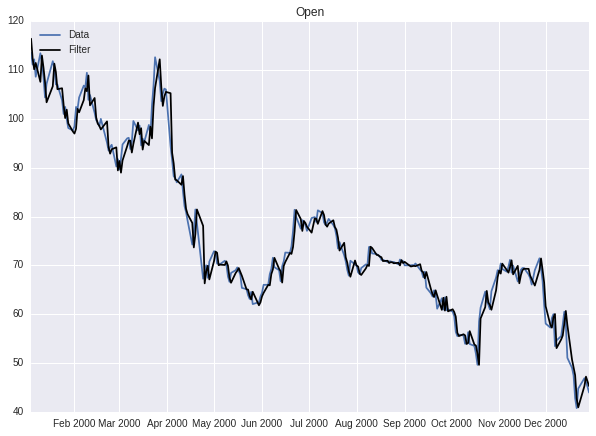

In [33]:
arimapf.plot_fit()

ValueError: x and y must have same first dimension

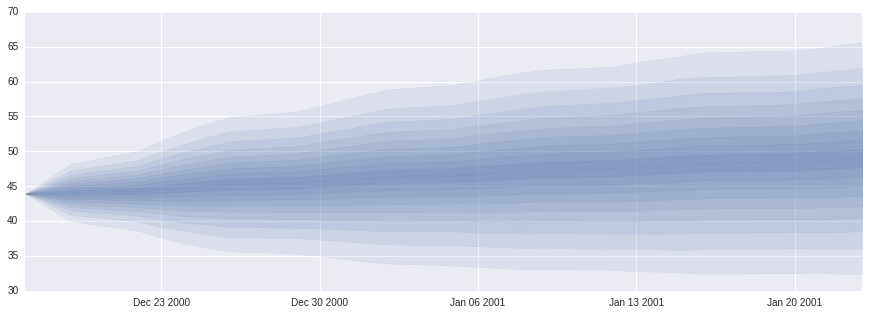

In [40]:
arimapf.plot_predict(h=25,past_values=252,figsize=(15,5))

In [56]:
prediction=arimapf.predict(h=55).Open

prediction.tail()

2001-02-15    52.517593
2001-02-19    52.624242
2001-02-20    52.729115
2001-02-21    52.832240
2001-02-22    52.933648
Name: Open, dtype: float64

In [47]:
msft2000.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
2000-12-22,44.75,47.12,44.75,46.44,54775900.0,0.0,1.0,15.412160,16.228402,15.412160,15.994206,109551800.0
2000-12-26,46.88,48.56,45.88,46.88,33470800.0,0.0,1.0,16.145744,16.724346,15.801338,16.145744,66941600.0
2000-12-27,46.12,46.81,45.00,46.44,34501900.0,0.0,1.0,15.883996,16.121636,15.498261,15.994206,69003800.0
2000-12-28,45.12,46.25,43.88,44.56,38809600.0,0.0,1.0,15.539590,15.928769,15.112527,15.346723,77619200.0
2000-12-29,43.94,45.81,43.00,43.38,49988800.0,0.0,1.0,15.133191,15.777230,14.809450,14.940324,99977600.0


In [51]:
yr2001=pd.date_range('2000-12-06','2001-02-22', freq='D')
msft2001 = msft.loc[yr2001].dropna()
observed = msft2001.Open
observed

2000-12-06    60.00
2000-12-07    53.44
2000-12-08    54.62
2000-12-11    55.50
2000-12-12    57.81
2000-12-13    60.50
2000-12-14    57.94
2000-12-15    51.05
2000-12-18    49.00
2000-12-19    47.44
2000-12-20    42.81
2000-12-21    40.75
2000-12-22    44.75
2000-12-26    46.88
2000-12-27    46.12
2000-12-28    45.12
2000-12-29    43.94
2001-01-02    44.12
2001-01-03    43.19
2001-01-04    47.81
2001-01-05    48.50
2001-01-08    48.94
2001-01-09    50.00
2001-01-10    51.00
2001-01-11    53.00
2001-01-12    54.88
2001-01-16    53.38
2001-01-17    53.62
2001-01-18    53.69
2001-01-19    60.00
2001-01-22    60.75
2001-01-23    59.75
2001-01-24    61.00
2001-01-25    62.75
2001-01-26    61.00
2001-01-29    63.56
2001-01-30    64.50
2001-01-31    63.00
2001-02-01    60.81
2001-02-02    62.50
2001-02-05    60.75
2001-02-06    62.06
2001-02-07    62.00
2001-02-08    63.75
2001-02-09    61.31
2001-02-12    58.81
2001-02-13    59.62
2001-02-14    57.62
2001-02-15    59.00
2001-02-16    57.00


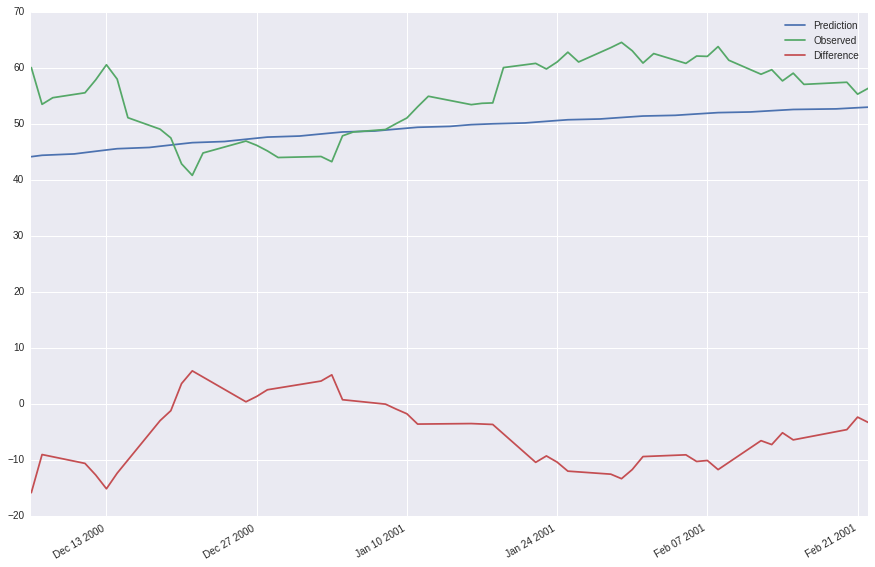

In [70]:
difference = prediction - observed
difference = difference.dropna()
difference.describe()
plt.figure(figsize=(15, 10))
prediction.plot(label='Prediction')
observed.plot(label='Observed')
difference.plot(label='Difference')
plt.legend(loc=0)